In [11]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

# Tree Visualisation
from sklearn.tree import export_graphviz
import graphviz

In [12]:
df = pd.read_csv('data\student\engagement\Student Engagement Level-Multiclass.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Student ID                                    486 non-null    object 
 1   # Logins                                      486 non-null    int64  
 2   # Content Reads                               486 non-null    int64  
 3   # Forum Reads                                 486 non-null    int64  
 4   # Forum Posts                                 486 non-null    int64  
 5   # Quiz Reviews before submission              486 non-null    int64  
 6   Assignment 1 lateness indicator               486 non-null    int64  
 7   Assignment 2 lateness indicator               486 non-null    int64  
 8   Assignment 3 lateness indicator               486 non-null    int64  
 9   Assignment 1 duration to submit (in hours)    486 non-null    flo

In [13]:
df['Engagement Level'] = df['Engagement Level'].map({'L': 0, 'M': 1, 'H': 2})
df = df.drop('Student ID', axis=1)

X = df.drop('Engagement Level', axis=1)
y = df['Engagement Level']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [15]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train, y_train)

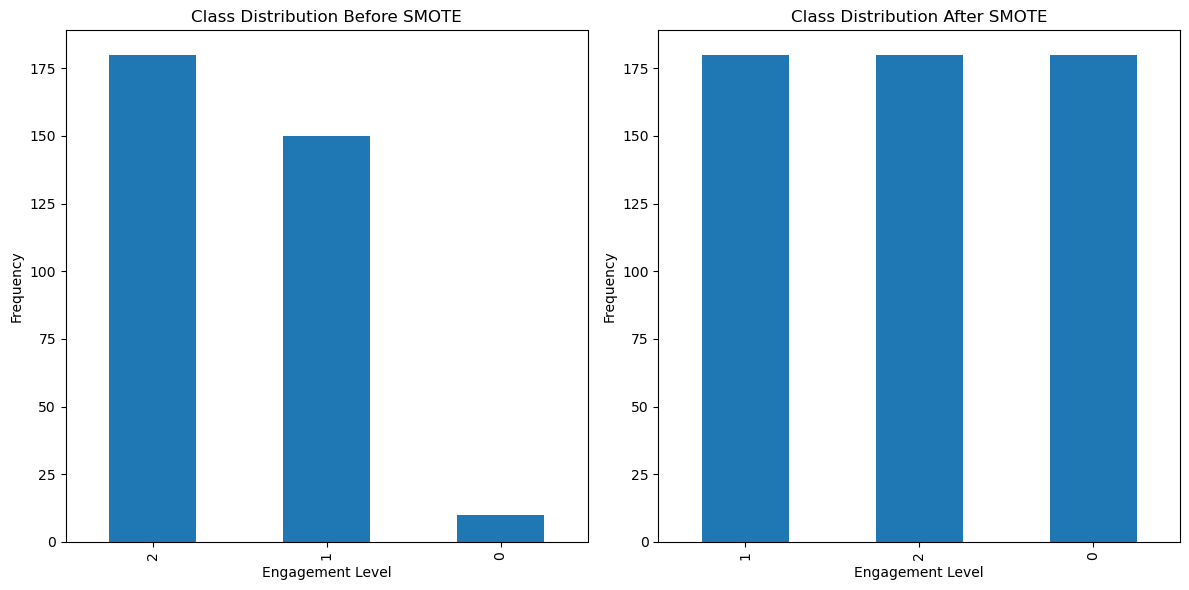

In [16]:
# Visualize the class distribution before and after data augmentation
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Before SMOTE
y_train.value_counts().plot(kind='bar', ax=ax[0], title='Class Distribution Before SMOTE')
ax[0].set_xlabel('Engagement Level')
ax[0].set_ylabel('Frequency')

# After SMOTE
y_smote.value_counts().plot(kind='bar', ax=ax[1], title='Class Distribution After SMOTE')
ax[1].set_xlabel('Engagement Level')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [17]:
rf = RandomForestClassifier()
rf.fit(X_smote, y_smote)

y_pred = rf.predict(X_test)

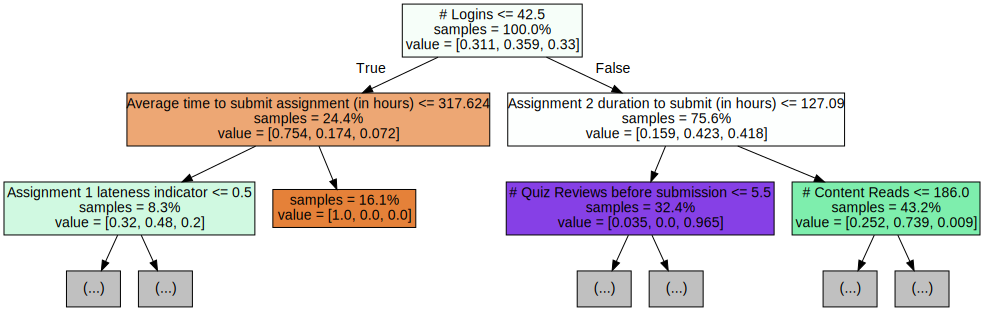

In [18]:
# Export the first three decision trees from the forest

for i in range(1):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [19]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.98      0.99        64
           2       1.00      1.00      1.00        78

    accuracy                           0.99       146
   macro avg       0.93      0.99      0.96       146
weighted avg       0.99      0.99      0.99       146



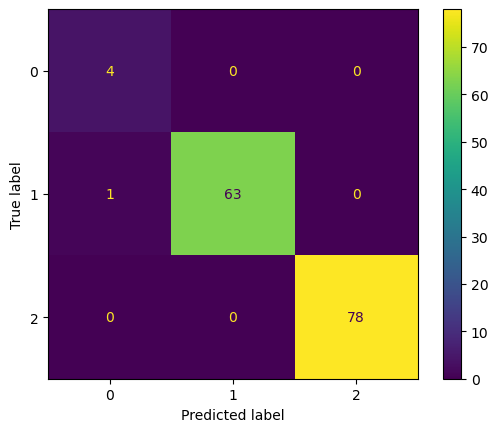

In [20]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()